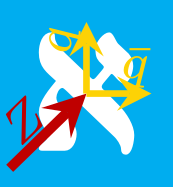

# $K^*$ decays in $Z\rightarrow q\bar{q}$ events

In this notebook we will investigate $Z\rightarrow q\bar{q}$ event for decays $K^{*0}$, $K^{*\pm}$, and $\phi$.

This is done in the class `KPi` (in [`kpi.py`](../pyzqq/kpi.py)). 

## Set-up

Before we go on to our analysis, we need to set up a few things. 

First, we modify the load path to allow loading of `pyzqq` code. 

In [10]:
from sys import path 
path.append('..')

We then load a utility to read in the data.  

In [11]:
from pyzqq.utils import loadResults

Use _MatPlotLib_ Notebook interface 

In [12]:
%matplotlib notebook 

## The data

Now that we have that utility in place, we can use that to load in the distributions for both real and simulated data. 

In [13]:
da_data = loadResults('zqqdaall.json')
mc_data = loadResults('zqqmcall.json')

Let us plot the invariant mass spectras in those results. 

<IPython.core.display.Javascript object>


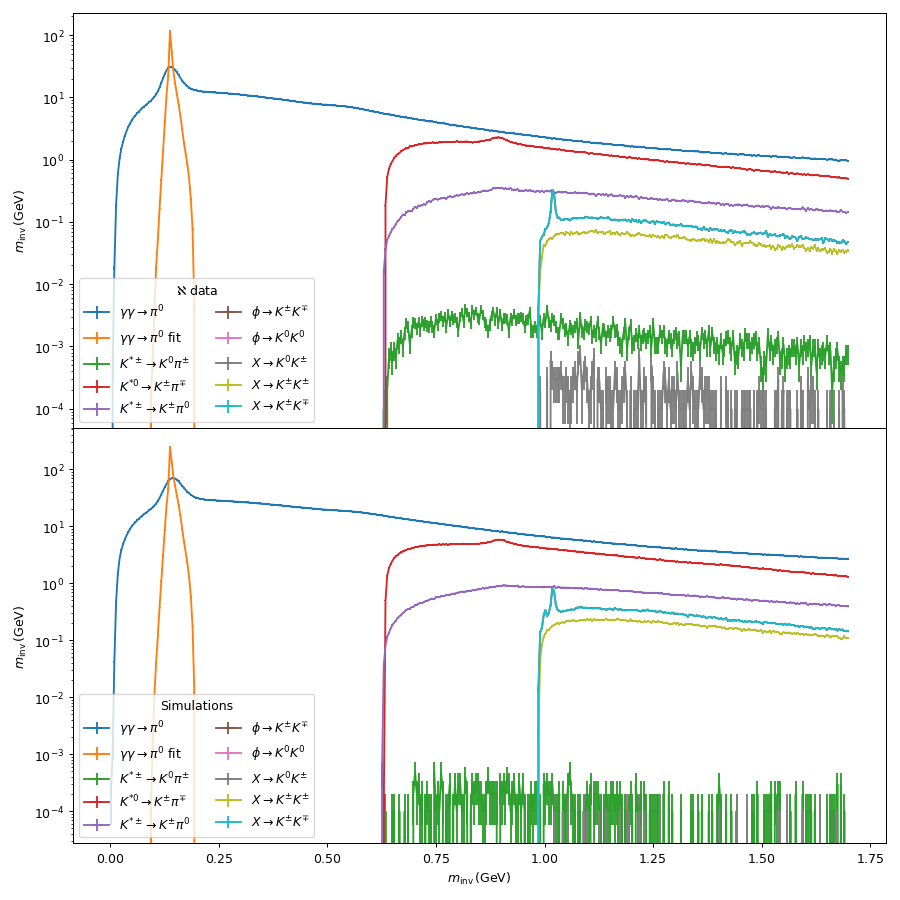

In [17]:
from matplotlib.pyplot import subplots 

fig, ax = subplots(nrows=2,sharex=True,gridspec_kw={'hspace':0},
                  figsize=(10,10))

def plotThem(dct,nev,ax):
    for name, hist in dct.items():
        if isinstance(hist,dict):
            for name2, hist2 in hist.items():
                if isinstance(hist2,list):
                    continue
                else:
                    hist2.plot(ax,density=True,nev=da_nev)
        else:
            hist.plot(ax,density=True,nev=da_nev)
        
da_nev = da_data['kpi']['nev']
plotThem(da_data['kpi']['inv_mass'],da_nev,ax[0])
    
mc_nev = mc_data['kpi']['nev']
plotThem(mc_data['kpi']['inv_mass'],mc_nev,ax[1])

ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].legend(title=r'$\aleph$ data',ncols=2)
ax[1].legend(title='Simulations',ncols=2)
fig.tight_layout()